# Support Vector Machines

In [9]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images_flat = train_images.reshape((60000, 28 * 28))
test_images_flat = test_images.reshape((10000, 28 * 28))

## Noramlize [0, 1]
train_images_flat = train_images_flat.astype('float32') / 255
test_images_flat = test_images_flat.astype('float32') / 255

## Labels to integers
train_labels_int = np.argmax(to_categorical(train_labels), axis=1) if train_labels.ndim > 1 else train_labels
test_labels_int = np.argmax(to_categorical(test_labels), axis=1) if test_labels.ndim > 1 else test_labels

## Training

### Training Loop

In [3]:
print("Training SVM...")

## PCA
#n_components = 120
n_components = 100
pca = PCA(n_components = n_components, random_state = 1)

train_images_pca = pca.fit_transform(train_images_flat)
test_images_pca = pca.transform(test_images_flat)

print(f"Explained variance ratio ({n_components} components): {np.sum(pca.explained_variance_ratio_):.4f}")

## Train
svm = SVC(kernel = 'rbf', C = 10, gamma = 'scale', verbose = True, random_state = 1)
svm.fit(train_images_pca, train_labels_int)
print('\nSVM Training done.')

Training SVM...
Explained variance ratio (100 components): 0.9146
[LibSVM]
SVM Training done.


### Prediction

In [4]:
test_pred_pca = svm.predict(test_images_pca)
accuracy = accuracy_score(test_labels_int, test_pred_pca)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(test_labels_int, test_pred_pca))


Accuracy: 0.9859

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Visualization

In [5]:
def visualize_predictions(images, true_labels, predictions, num_samples = 10):
    plt.figure(figsize = (15, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap = 'gray')
        plt.title(f'True: {true_labels[i]}\nPred: {predictions[i]}', fontsize = 10)
        plt.axis('off')
    plt.show()

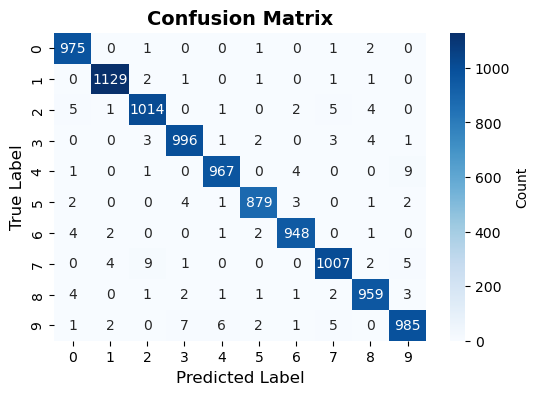

predictions for image 4320 to 4330:


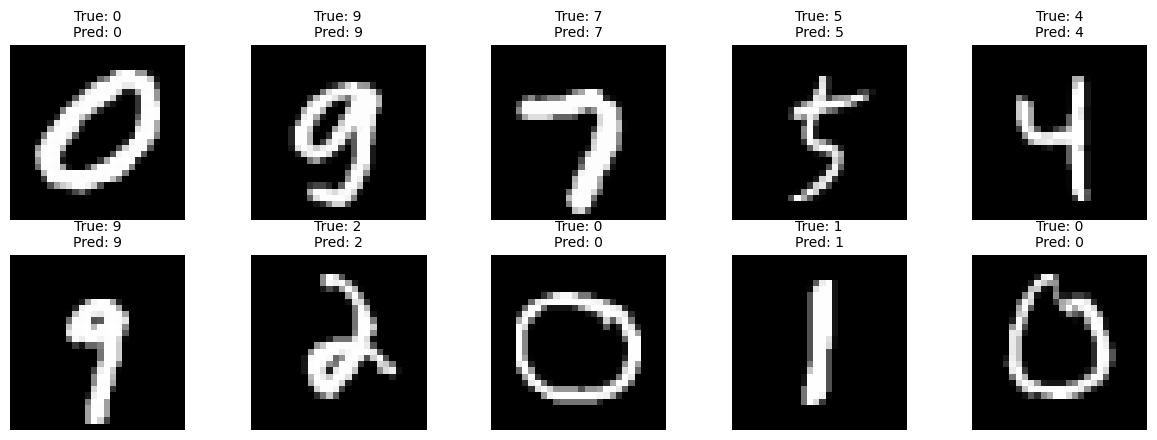

In [18]:
## Confusion Matrix
cm = confusion_matrix(test_labels_int, test_pred_pca)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Count'}, 
            annot_kws={"size": 10})
plt.title('Confusion Matrix', fontsize = 14, fontweight = 'bold')
plt.xlabel('Predicted Label', fontsize = 12)
plt.ylabel('True Label', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

## Sample predictions
from numpy.random import randint

rand_start = np.random.randint(0, 9990)
rand_end = rand_start + 10

print(f"predictions for image {rand_start} to {rand_end}:")

np.random.randint(rand_start, rand_end)
visualize_predictions(
    test_images[rand_start : rand_end],
    test_labels_int[rand_start : rand_end],
    test_pred_pca[rand_start : rand_end]
    )